In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

In [3]:
# Create a shuffle split
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

regressor = DecisionTreeRegressor()
cv_results_tree = cross_validate(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error", return_train_score=True
)

errors_tree = pd.Series(-cv_results_tree["test_score"], name="Decision Tree")
errors_tree.describe()

count    30.000000
mean     45.790110
std       1.197968
min      43.462007
25%      44.910197
50%      45.715133
75%      46.770925
max      48.228388
Name: Decision Tree, dtype: float64

In [5]:
# Dummy regressor
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()
cv_results_dummy = cross_validate(
    dummy, data, target, cv=cv, scoring="neg_mean_absolute_error", return_train_score=True
)
errors_dummy = pd.Series(-cv_results_dummy["test_score"], name="Dummy Regressor")
errors_dummy.describe()

count    30.000000
mean     91.140009
std       0.821140
min      89.757566
25%      90.543652
50%      91.034555
75%      91.979007
max      92.477244
Name: Dummy Regressor, dtype: float64

Text(0, 0.5, 'Mean Absolute Error (in $1000s)')

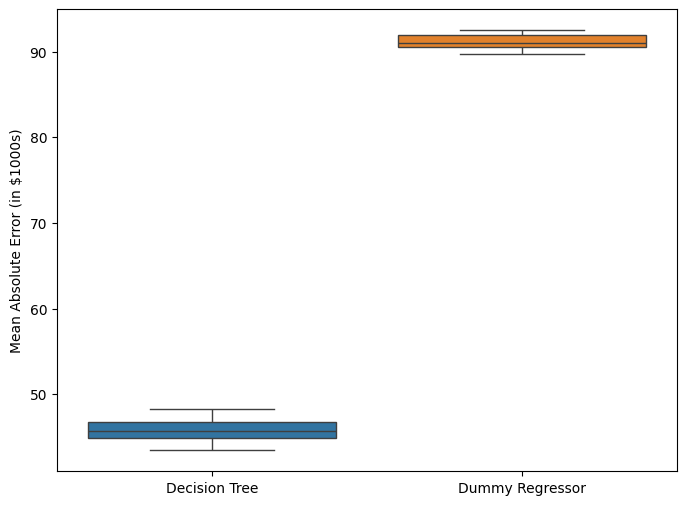

In [6]:
all_errors = pd.concat([errors_tree, errors_dummy], axis=1)
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_errors)
plt.ylabel("Mean Absolute Error (in $1000s)")

Text(0, 0.5, 'R2 Score')

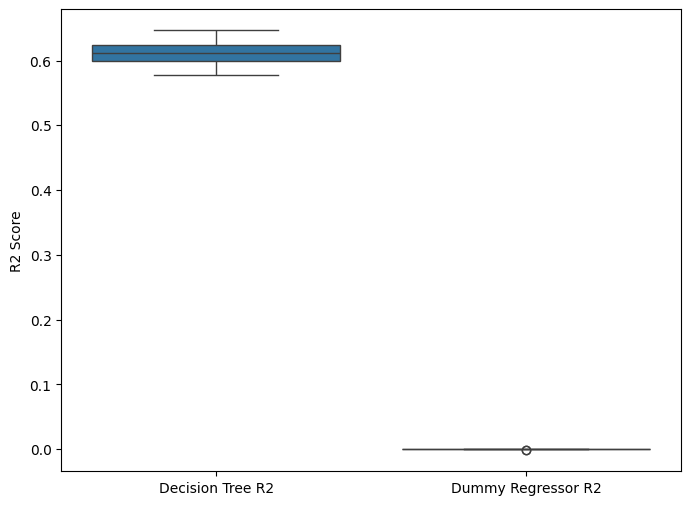

In [7]:
cv_results_tree = cross_validate(
    regressor, data, target, cv=cv, scoring="r2", return_train_score=True
)
errors_tree_r2 = pd.Series(cv_results_tree["test_score"], name="Decision Tree R2")

cv_results_dummy = cross_validate(
    dummy, data, target, cv=cv, scoring="r2", return_train_score=True
)
errors_dummy_r2 = pd.Series(cv_results_dummy["test_score"], name="Dummy Regressor R2")

all_errors_r2 = pd.concat([errors_tree_r2, errors_dummy_r2], axis=1)
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_errors_r2)
plt.ylabel("R2 Score")

In [8]:
# Exercise M7.01
# Dummy classifier

adult_census = pd.read_csv("data/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

In [9]:
# Create a shuffle cv
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [10]:
# Create a pipeline with StandardScalar and LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_pipe = make_pipeline(
    StandardScaler(), LogisticRegression(max_iter=1000)
)


In [11]:
# Compute cross-validation scores
from sklearn.model_selection import cross_validate
cv_logistic = cross_validate(
    logistic_pipe, data, target, cv=cv, scoring="accuracy", return_train_score=True
)
cv_logistic_df = pd.DataFrame(cv_logistic)
cv_logistic_df

,fit_time,score_time,test_score,train_score
0,0.045744,0.008177,0.812263,0.814450
1,0.043256,0.006819,0.813901,0.814092
2,0.044369,0.007114,0.818610,0.813093
3,0.043514,0.006330,0.808271,0.815550
4,0.040888,0.006730,0.808169,0.815550
5,0.041585,0.006706,0.816767,0.813477
6,0.044369,0.006765,0.808271,0.815525
7,0.040613,0.006239,0.812570,0.814501
8,0.040422,0.006920,0.814311,0.813733
9,0.042921,0.006045,0.816767,0.813708


In [12]:
# Create a dummy classifier that constantly predicts the most frequent class
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
cv_dummy = cross_validate(
    dummy, data, target, cv=cv, scoring="accuracy", return_train_score=True
)
cv_dummy_df = pd.DataFrame(cv_dummy)
cv_dummy_df

,fit_time,score_time,test_score,train_score
0,0.010179,0.005881,0.759546,0.761011
1,0.010288,0.004944,0.754120,0.762368
2,0.008076,0.004825,0.763947,0.759911
3,0.008176,0.005023,0.758727,0.761216
4,0.008138,0.004637,0.760262,0.760832
5,0.008401,0.004683,0.761081,0.760628
6,0.008205,0.004583,0.754018,0.762393
7,0.008631,0.005326,0.759648,0.760986
8,0.008390,0.005462,0.764971,0.759655
9,0.010807,0.004753,0.765790,0.759450


In [13]:
cv_all = pd.concat([cv_logistic_df["test_score"], cv_dummy_df["test_score"]], axis=1)
cv_all.columns = ["Logistic Regression", "Dummy Classifier"]
cv_all['difference'] = cv_all["Logistic Regression"] - cv_all["Dummy Classifier"]
cv_all

,Logistic Regression,Dummy Classifier,difference
0,0.812263,0.759546,0.052718
1,0.813901,0.754120,0.059781
2,0.818610,0.763947,0.054663
3,0.808271,0.758727,0.049544
4,0.808169,0.760262,0.047907
5,0.816767,0.761081,0.055686
6,0.808271,0.754018,0.054253
7,0.812570,0.759648,0.052923
8,0.814311,0.764971,0.049340
9,0.816767,0.765790,0.050978


Text(0, 0.5, 'Accuracy')

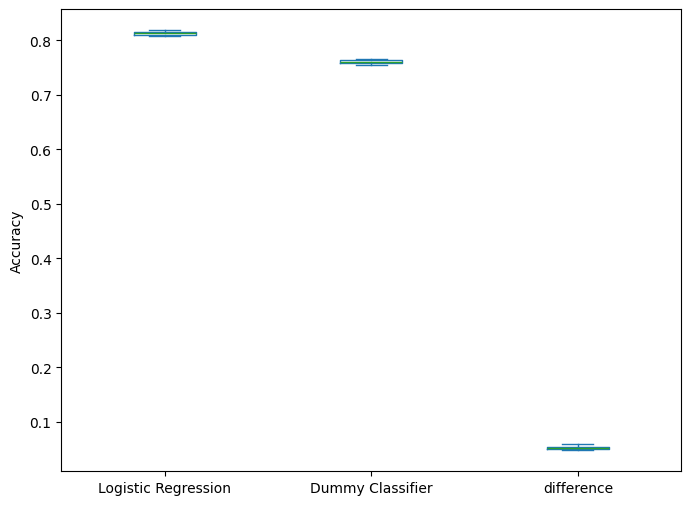

In [14]:
cv_all.plot.box(figsize=(8, 6))
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

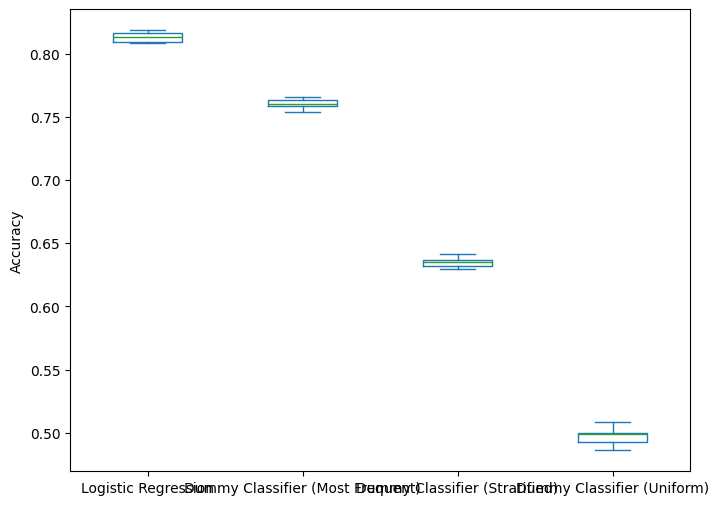

In [15]:
dummy2 = DummyClassifier(strategy="stratified")
cv_dummy2 = cross_validate(
    dummy2, data, target, cv=cv, scoring="accuracy", return_train_score=True
)
cv_dummy2_df = pd.DataFrame(cv_dummy2)

dummy3 = DummyClassifier(strategy="uniform")
cv_dummy3 = cross_validate(
    dummy3, data, target, cv=cv, scoring="accuracy", return_train_score=True
)
cv_dummy3_df = pd.DataFrame(cv_dummy3)

cv_all_extended = pd.concat(
    [
        cv_logistic_df["test_score"],
        cv_dummy_df["test_score"],
        cv_dummy2_df["test_score"],
        cv_dummy3_df["test_score"],
    ],
    axis=1,
)
cv_all_extended.columns = [
    "Logistic Regression",
    "Dummy Classifier (Most Frequent)",
    "Dummy Classifier (Stratified)",
    "Dummy Classifier (Uniform)",
]
cv_all_extended.plot.box(figsize=(8, 6))
plt.ylabel("Accuracy")